In [ ]:
# TODO: Import libraries required here
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

In [ ]:
# Using MNIST dataset: 28x28 grayscale images
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))


train_size = 0.7
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = train_size)

# Normalize pixel values to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add channel dimension (CNN expects 3D inputs)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)
# Each image is 28×28 pixels, grayscale (1 channel).
# Normalization helps the model learn faster.

Training set shape: (49000, 28, 28, 1)
Test set shape: (21000, 28, 28, 1)


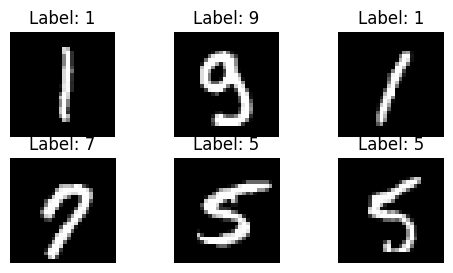

In [ ]:
# Show images
plt.figure(figsize=(6,3))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# What do you notice about how similar some digits look?
# Things to think about: What do you notice about how similar some digits look?

In [ ]:
#Building a simple CNN

model = models.Sequential([
    # TODO: Add first Conv2D layer (32 filters, 3x3 kernel, 'relu', input_shape=(28,28,1))
    # layers.Conv2D(...),

    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),

    # TODO: Add MaxPooling layer (2x2)
    layers.MaxPooling2D(2, 2),

    # TODO: Add second Conv2D layer (64 filters, 3x3, 'relu')
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)),

    # TODO: Add second MaxPooling layer
    layers.MaxPooling2D(2,2),

    layers.Flatten(),

    # TODO: Add Dense layer with 64 units, 'relu' activation
    layers.Dense(64, activation='relu'),

    # TODO: Add final Dense layer with 10 units, 'softmax' activation
    layers.Dense(10, activation='softmax')
])

model.summary()

# Exercise:
# Why do early layers detect edges and later layers detect shapes? Discuss.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the Model

# TODO: Compile the model using:
# optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=10,          # Can increase for better performance
                    batch_size=64,
                    validation_split=0.1, # 10% data for validation
                    verbose=2)

Epoch 1/10
690/690 - 9s - 13ms/step - accuracy: 0.9376 - loss: 0.2127 - val_accuracy: 0.9753 - val_loss: 0.0724
Epoch 2/10
690/690 - 2s - 3ms/step - accuracy: 0.9808 - loss: 0.0625 - val_accuracy: 0.9829 - val_loss: 0.0512
Epoch 3/10
690/690 - 2s - 3ms/step - accuracy: 0.9871 - loss: 0.0430 - val_accuracy: 0.9863 - val_loss: 0.0351
Epoch 4/10
690/690 - 2s - 3ms/step - accuracy: 0.9895 - loss: 0.0342 - val_accuracy: 0.9896 - val_loss: 0.0392
Epoch 5/10
690/690 - 2s - 4ms/step - accuracy: 0.9914 - loss: 0.0265 - val_accuracy: 0.9892 - val_loss: 0.0338
Epoch 6/10
690/690 - 3s - 4ms/step - accuracy: 0.9938 - loss: 0.0191 - val_accuracy: 0.9888 - val_loss: 0.0386
Epoch 7/10
690/690 - 2s - 3ms/step - accuracy: 0.9947 - loss: 0.0171 - val_accuracy: 0.9908 - val_loss: 0.0313
Epoch 8/10
690/690 - 2s - 3ms/step - accuracy: 0.9960 - loss: 0.0124 - val_accuracy: 0.9873 - val_loss: 0.0463
Epoch 9/10
690/690 - 2s - 3ms/step - accuracy: 0.9964 - loss: 0.0111 - val_accuracy: 0.9878 - val_loss: 0.0390


In [ ]:
# Evaluate the Model

# TODO: Evaluate test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"\nTest accuracy: {test_acc:.3f}")

657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9872 - loss: 0.0537

Test accuracy: 0.986


In [ ]:
# Make Predictions

# TODO: Predict the first 9 test images
predictions = model.predict(x_test[:9])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


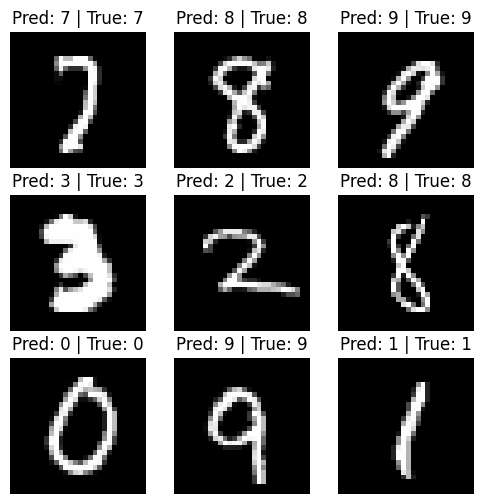

In [ ]:
import numpy as np

# Get predictions for all test samples (outside the plotting loop)
preds = model.predict(x_test)              # preds.shape: (num_samples, num_classes)
pred_classes = np.argmax(preds, axis=1)    # Class with highest probability

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title(f"Pred: {pred_classes[i]} | True: {y_test[i]}")
    plt.axis('off')
plt.show()
